## Project: Reduce Maintenance Cost Through Predictive Techniques
### Kristen Groom - Data Scientist (Entry-Level), Product Analytics (Temporary) Position Analysis
### September 11, 2019

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Machine Learning Predictive Models</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>


\*Project structure follows basic template outline provided through the Udacity Data Analytics nanodegree found at: https://www.udacity.com/course/data-analyst-nanodegree--nd002

<a id='intro'></a>
## Introduction

> <ul>
    <li><h3>Background:</h3>
        <p>Company (Cloud BOT) has a fleet of devices transmitting daily aggregated telemetry attributes. Predictive maintenance techniques are designed to help determine the condition of in-service equipment in order to predict when maintenance should be performed. This approach promises cost savings over routine or time- based preventive maintenance, because tasks are performed only when warranted.</p>
    </li>
        <li><h3>Goal:</h3>
        <p>Build a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict is called failure with binary value 0 for non-failure and 1 for failure.</p>
    </li>
    <li><h3>Code:</h3>
        <p>We are looking for you to show off your coding skills using Python. Please keep in mind we are not looking for a correct answer. We are looking for you to show how you think and problem solve. The data is purposefully dirty and confusing.</p>
    </li>
    <li><h3>Data:</h3>
        <table style="width:50%">
          <tr>
            <th>Columns</th>
            <th>Description</th>
          </tr>
          <tr>
            <td>Date</td>
            <td>Date in YYYY-MM-DD format</td>
          </tr>
          <tr>
            <td>Device</td>
            <td>Device id</td>
          </tr>
          <tr>
            <td>Failure</td>
            <td>Non-failure is 0, failure is 1</td>
          </tr> 
          <tr>
            <td>Attribute 1-9</td>
            <td>Daily aggregated telemetry</td>
          </tr> 
        </table>
            </li>
        <li><h3>Report:</h3>
        <p>Please return a converted PDF document from Markdown displaying your code and thought process.</p>
    </li>
    
</ul>

\* Requirements:"Data_Scientist_Data_Challenge.pdf"

<a id='wrangling'></a>
## Data Wrangling

> In this section of the analysis, I will load in the data, check for cleanliness, and then trim and clean the dataset as needed for analysis. 

In [341]:
# import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
%matplotlib inline

In [342]:
# read in the .csv file
df = pd.read_csv('device_failure_data_scientist.csv')

In [343]:
# view a section of the data
df.head()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [344]:
# size of dataset
df.shape

(124494, 12)

In [345]:
# dataset variables and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null int64
device        124494 non-null object
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
failure       124494 non-null int64
dtypes: int64(11), object(1)
memory usage: 11.4+ MB


In [346]:
# look at date and device a bit more closely to see if these are all unique id's
df['device'].value_counts()

# I see that there are 1168 different devices so I will consider this an idenfification attribute 
# that will not be used in the final predictive models, however I will keep this attribute in the dataset to explore
# further within the Exploratory Data Analysis section.

W1F05X69    304
S1F0FP0C    304
Z1F0QL3N    304
W1F0JXDL    304
S1F0GPXY    304
Z1F0KKN4    304
W1F0JH87    304
Z1F0QK05    304
S1F0GGPP    304
S1F0H6JG    304
S1F0EGMT    304
W1F0FY92    304
S1F0E9EP    304
S1F0GCED    304
Z1F0GB8A    304
W1F0FEH7    304
W1F0SJJ2    304
W1F0G9T7    304
S1F0FGBQ    304
W1F0FZPA    304
Z1F0Q8RT    304
Z1F0MA1S    304
Z1F0KJDS    304
Z1F0QLC1    304
Z1F0GE1M    304
S1F0KYCR    304
W1F0JY02    304
W1F0T0B1    299
S1F13432    295
Z1F0VNSW    295
           ... 
S1F03RV3      5
W1F0KDDQ      5
Z1F0L4J2      5
W1F0KJMC      5
Z1F0LSNM      5
S1F0B5QJ      5
S1F0LDLW      5
W1F0KCZ0      5
S1F05NAJ      5
S1F0CT09      5
Z1F0L78Z      5
S1F0LEBM      5
Z1F1AGW1      5
W1F0H9RN      5
Z1F0LSQ2      5
S1F08S38      5
S1F0CVRM      5
Z1F14F5V      5
W1F1CAKS      5
Z1F0LR8G      5
W1F1CJKT      5
W1F0ED5X      5
Z1F118C9      5
S1F0CT4F      5
W1F0BJ6E      5
Z1F17Z3N      5
Z1F0LT4K      5
S1F09MSM      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 11

In [347]:
df['date'].value_counts()

# There are 304 different date values, although these values are confusing given my expected YYYY-MM-DD format.
# In practice, I would ask an expert for more information regarding the coding of the date b/c when I use 
# pandas.to_datetime() method, the results are not what I would be expecting.  
# At this point, I would like to continue to explore the dataset in order
# to decide if I will keep this column to be used for the predictive models.

15002    1163
15003    1163
15001    1163
15004    1162
15005    1161
15006    1054
15007     798
15008     756
15009     756
15011     755
15012     755
15010     755
15013     755
15014     716
15017     715
15015     715
15016     715
15029     715
15018     714
15019     713
15020     713
15024     712
15039     712
15031     712
15030     712
15025     712
15038     712
15028     712
15021     712
15027     712
         ... 
15251     146
15252     146
15275     146
15279     141
15281     141
15282     141
15280     141
15285     140
15283     140
15284     140
15246     115
15286     111
15287     111
15289     109
15290     109
15292     109
15291     109
15288     109
15294      69
15293      69
15295      69
15299      32
15296      32
15297      32
15298      32
15302      31
15300      31
15303      31
15306      31
15304      31
Name: date, Length: 304, dtype: int64

> Dataset consists of 124,494 instances/rows of telemetry data, with 12 attributes/columns including the following:
 * device - id attribute (String datatype): I will remove this attribute before performing my predictive analysis.
 * date - numeric attribute, which according to the schema, we would be expecting to be in format YYYY-MM-DD, however given the ambiguity of the format, I will continue exploring before I decide to keep or to drop this column for analysis.  
 * Attributes - numeric attributes representing aggregated telemetry data.

In [348]:
# check for duplicated rows
sum(df.duplicated())

0

In [349]:
# check for null values
df[df.isnull().any(axis = 1)]

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure


> No duplicated rows or null values were found within the dataset, which is confirmed above when performing df.info().

In [350]:
# descriptive statistics
df.describe()

,date,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,15106.222798,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,0.000851
std,78.412061,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,0.029167
min,15001.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,15040.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,0.000000
50%,15086.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,0.000000
75%,15168.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,0.000000
max,15306.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,1.000000


> In the above table, I can see that there appears to be highly skewed data distributions for some of the variables and I can see that there may be potential outliers.  I am also noting large ranges of values between and within the variables which I will address in one way by scaling the data, although I would like to view some visualizations of the data to confirm my assumptions of skewness and potential outliers.

In [351]:
# check groupings of fail/no-fail for the devices
fail_count = df.groupby('failure')['device'].count()

In [352]:
# check values:
fail_count

failure
0    124388
1       106
Name: device, dtype: int64

In [353]:
# confirm percentage of failures (same value as mean for failure attribute)
fail_count[1]/fail_count[0]

0.0008521722352638518

> This dataset shows a high degree of class imbalance due to the very low percentage of failures for the dataset.  This is also confirmed in the descriptive statistics for the dataset wherein the mean value for the failure attribute is 0.000851. I would initially assume this dataset to be a high recall issue dataset, meaning, False Negatives would be more detrimental - that is, having a system that is prone to failure but being misdiagnosed as healthy, which could lead to more significant repair costs for company Cloud Bot.  I simultaneously acknowledge the company's goal of reducing False Positives and False Negatives so I will review various metrics including Recall, Precision, Accuracy, F1, and AUC in determining the best model for this dataset.  I have been researching the best ways to deal with class imbalanced data and some options could be undersampling the no-failure class, or oversample the failure instances, or SMOTE (generating synthetic points).  After reading this article: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
I learned that reworking the data may not ideal or if I do choose to do so, I would, of course, need to be thoughtful about my choices and understand that bias will be introduced.  Obtaining more features is not possible either so one way that I may attempt to resolve this issue is to perform stratified sampling of the data.  I will continue to look for additional options.

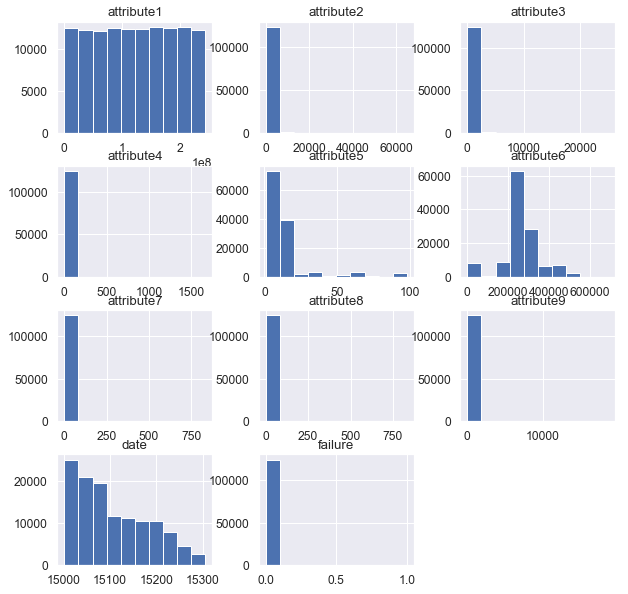

In [354]:
df.hist(figsize=[10,10]);

> I see right skewed distributions for the telemetry attributes with the majority of attribute values being 0.  I will scale the data and check distributions once again prior to performing predictive analytics.

In [355]:
# view correlations among attributes
df.corr()

,date,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
date,1.000000,-0.005603,-0.007317,-0.001580,-0.006484,-0.013455,0.139643,0.021653,0.021653,-0.026538,0.000627
attribute1,-0.005603,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122,0.001984
attribute2,-0.007317,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,0.052902
attribute3,-0.001580,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,-0.000948
attribute4,-0.006484,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,0.067398
attribute5,-0.013455,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949,0.002270
attribute6,0.139643,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152,-0.000550
attribute7,0.021653,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.119055
attribute8,0.021653,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.119055
attribute9,-0.026538,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000,0.001622


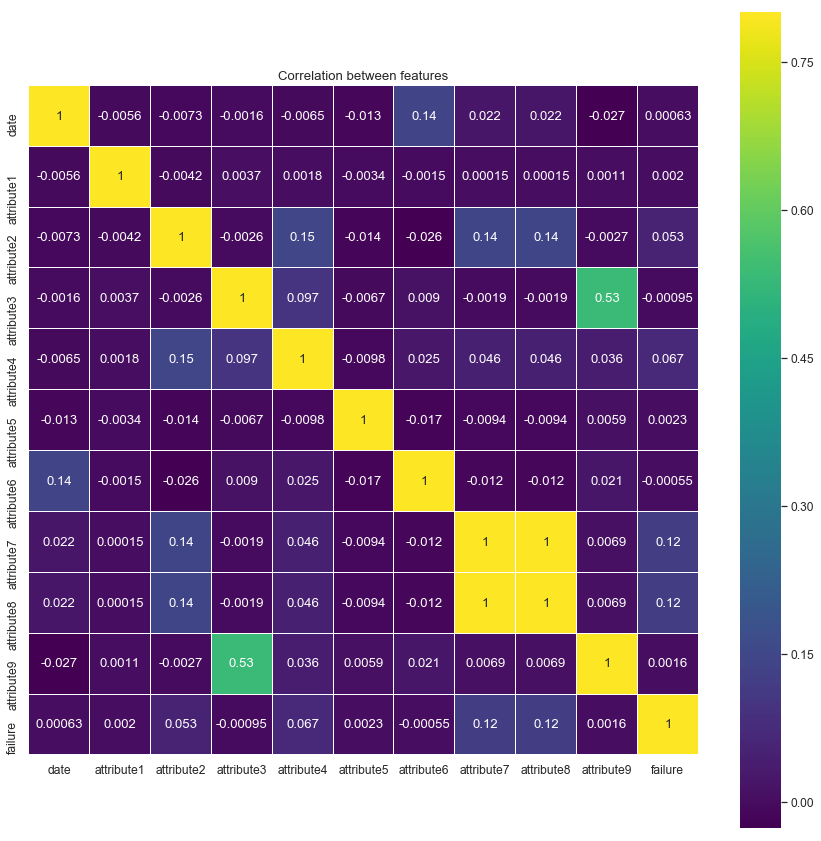

In [356]:
# visualize correlations:
# using template found at: https://www.kaggle.com/chapagain/house-prices-eda-data-modelling-and-prediction

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

corr_matrix = df.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

> The correlation matrix and the heatmap show that the majority of the variables do not indicate strong multicollinearity, which means that two variables show a strong linear relationship.  I do, however, see a perfect correlation between attribute 7 and attribute 8 and a moderate correlation between attribute 9 and attribute 3.  The perfect correlation could mean that these two attributes are basically the same attribute and one would need to be removed.  I also may still perform logistic regression even though the scatterplot matrix shows non-linear relationships and I do not think that the slight multicollinearity of 9 and 3 should be problematic for the Machine Learning models that I will be building.  I also notice that the attributes with the highest correlation with failure are attributes 7 and 8. Attributes 2 and 4, also show slightly more correlation to failure than some of the others.  I see a very low correlation between date and failure so I will not choose to keep this attribute in the final predictive models.

<a id='eda'></a>
## Exploratory Data Analysis

> The purpose of this section is to utilize EDA to further explore the data and note interesting findings

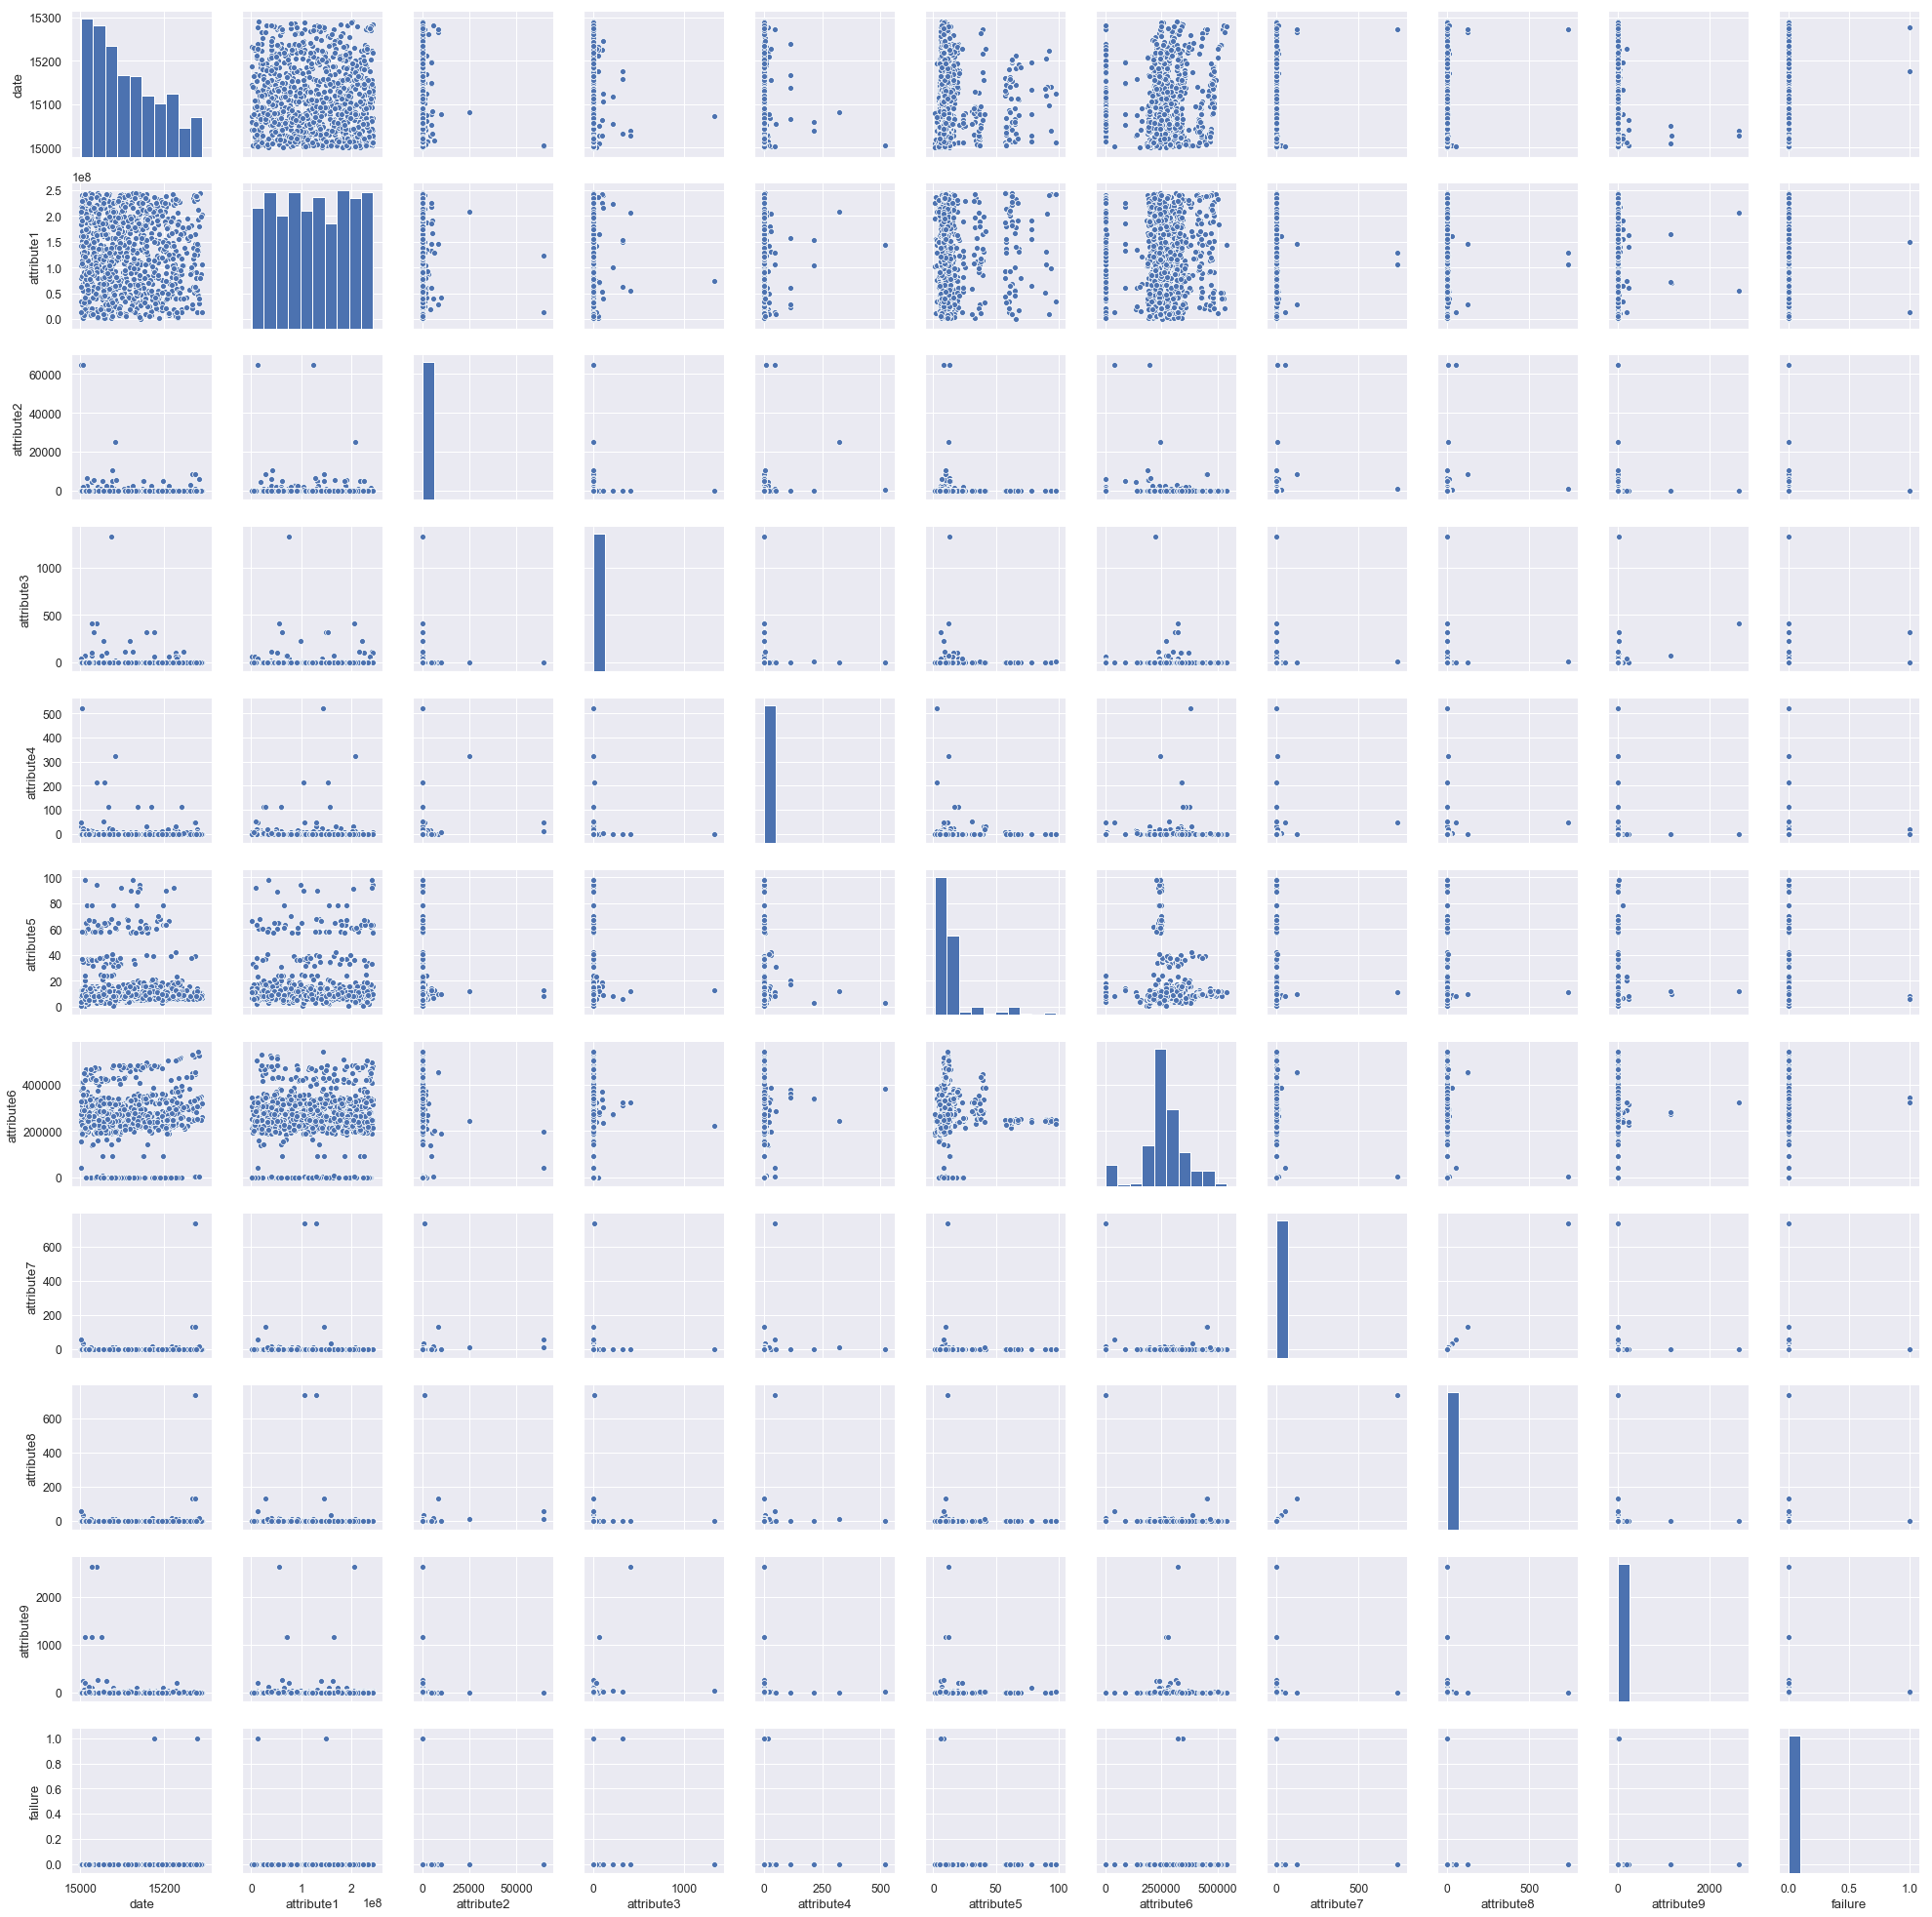

In [357]:
# check for outliers - although, given that I am unfamiliar with the telemetry data, if I find outliers, I will not
# remove them, because these values could be important information for our analysis in predicting device failures.  

# view scatter plots
# sns.pairplot(df, hue="failure");

# I tried to complete a full pairplot matrix, but it was taking a very long time so I'll try with a sample of values:
sns.pairplot(df.sample(1000))

> The scatterplots are indicating non-linear relationships, which would make a linear model unreliable in predicting device failure.  I would still like to perform Logistic Regression to predict probabilities in addition to other Machine Learning models that are less influenced by the linearity of the data. I see potential outliers and influential points in the scatter plots, and although I will perform further checks for outliers, I will not remove them, because these values could be keys to understanding which attributes contribute to the detection of failures.

In [358]:
# further outlier checking using z-scores

z = np.abs(stats.zscore(df.iloc[:, 2:]))

In [359]:
# seeing how many instances are > 3 standard deviations above the mean
threshold = 3

# tuple that holds two np.arrays - first with list of row nums, second with respective col nums
z_greater_than_mean = np.where(z > 3)

In [360]:
print(len(z_greater_than_mean[0]))

# there are over 7000 instances of values that appear to be outliers.  I am choosing to keep the values 
# in the dataset for predictive analysis in order to avoid as much as possible introducing bias in the data, 
# although I would explore this large number of potential outliers further in practice.

7575


In [361]:
# I'd like to explore which devices are the ones with the most failures
# first group the devices by the number of failures
device_fails = df.groupby('device')['failure'].sum()
device_fails.head()

device
S1F01085    0
S1F013BB    0
S1F0166B    0
S1F01E6Y    0
S1F01JE0    0
Name: failure, dtype: int64

In [362]:
# find device/devices with largest number of failures
device_fails[device_fails == device_fails.max()]

device
S1F023H2    1
S1F03YZM    1
S1F09DZQ    1
S1F0CTDN    1
S1F0DSTY    1
S1F0F4EB    1
S1F0GG8X    1
S1F0GJW3    1
S1F0GKFX    1
S1F0GKL6    1
S1F0GPFZ    1
S1F0GSD9    1
S1F0GSHB    1
S1F0J5JH    1
S1F0JD7P    1
S1F0JGJV    1
S1F0L0DW    1
S1F0LCTV    1
S1F0LCVC    1
S1F0LD15    1
S1F0LD2C    1
S1F0P3G2    1
S1F0PJJW    1
S1F0QF3R    1
S1F0QY11    1
S1F0RR35    1
S1F0RRB1    1
S1F0RSZP    1
S1F0S2WJ    1
S1F0S4CA    1
           ..
W1F1BS0H    1
W1F1BZTM    1
W1F1C9TE    1
W1F1C9WG    1
W1F1CB5E    1
W1F1CDDP    1
W1F1CJ1K    1
W1F1DQN8    1
Z1F04GCH    1
Z1F0B4XZ    1
Z1F0FSBY    1
Z1F0K451    1
Z1F0LSNZ    1
Z1F0LVGY    1
Z1F0LVPW    1
Z1F0MCCA    1
Z1F0MRPJ    1
Z1F0NVZA    1
Z1F0P16F    1
Z1F0P5D9    1
Z1F0QH0C    1
Z1F130LH    1
Z1F148T1    1
Z1F14BGY    1
Z1F1653X    1
Z1F1901P    1
Z1F1AG5N    1
Z1F1FCH5    1
Z1F1RJFA    1
Z1F1VQFY    1
Name: failure, Length: 106, dtype: int64

> The maximum number of failures is 1, and there are approximately 100 devices that have failed once in this dataset.

In [363]:
# print mean values of attributes given fail/no-fail
for attribute in df.columns[2:-1]:
    print('{}: '.format(attribute))
    att_mean = df.groupby('failure')[attribute].mean()
    print(att_mean)
    print('*'*40)

attribute1: 
failure
0    1.223827e+08
1    1.271755e+08
Name: attribute1, dtype: float64
****************************************
attribute2: 
failure
0     156.118725
1    4109.433962
Name: attribute2, dtype: float64
****************************************
attribute3: 
failure
0    9.945598
1    3.905660
Name: attribute3, dtype: float64
****************************************
attribute4: 
failure
0     1.696048
1    54.632075
Name: attribute4, dtype: float64
****************************************
attribute5: 
failure
0    14.221637
1    15.462264
Name: attribute5, dtype: float64
****************************************
attribute6: 
failure
0    260174.451056
1    258303.481132
Name: attribute6, dtype: float64
****************************************
attribute7: 
failure
0     0.266682
1    30.622642
Name: attribute7, dtype: float64
****************************************
attribute8: 
failure
0     0.266682
1    30.622642
Name: attribute8, dtype: float64
*************************

> These results are interesting to me in that I can see that some of the mean values differ quite a bit for certain attributes, such as attribute2, attribute4, attribute7, attribute8, and attribute9.  I still see that attributes 7 and 8 have the exact same values so I will remove one of these redundant attributes.  The higher difference mean values could be informing us about the significance of these attributes in determining potential device failure, and these results confirm what I noticed in the heatmap, that attributes 2,4,7,8 showed the highest correlations to failure.  I will perform feature selection in my predictive analysis to compare significant features with these results.

In [364]:
# before I move on to predictive models, I will get the dataset into the proper format by removing the idenfication
# column: device, and the date column, and by normalizing the data so that it will be scaled appropriately.  I will
# also remove attribute8 as a redundant feature.

df = df.drop(columns=['device', 'date', 'attribute8'])

In [365]:
df.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,failure
0,215630672,56,0,52,6,407438,0,7,0
1,61370680,0,3,0,6,403174,0,0,0
2,173295968,0,0,0,12,237394,0,0,0
3,79694024,0,0,0,6,410186,0,0,0
4,135970480,0,0,0,15,313173,0,3,0


In [366]:
# I do not want to scale failure so I will remove this column and hold it in its own variable:
target = df.failure

In [367]:
df = df.drop(columns=['failure'])

In [368]:
df.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,215630672,56,0,52,6,407438,0,7
1,61370680,0,3,0,6,403174,0,0
2,173295968,0,0,0,12,237394,0,0
3,79694024,0,0,0,6,410186,0,0
4,135970480,0,0,0,15,313173,0,3


In [369]:
# normalization process using sklearn
from sklearn import preprocessing

In [370]:
# we first create an instance of MinMaxScaler() to use to fit data
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [371]:
# fit the data using the MinMaxScaler object
df_norm = min_max_scaler.fit_transform(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [372]:
# viewing results
np.set_printoptions(precision=4, linewidth=100)
df_norm[:1000]

array([[8.8322e-01, 8.6196e-04, 0.0000e+00, ..., 5.9120e-01, 0.0000e+00, 3.7431e-04],
       [2.5137e-01, 0.0000e+00, 1.2034e-04, ..., 5.8502e-01, 0.0000e+00, 0.0000e+00],
       [7.0982e-01, 0.0000e+00, 0.0000e+00, ..., 3.4446e-01, 0.0000e+00, 0.0000e+00],
       ...,
       [2.1754e-01, 0.0000e+00, 0.0000e+00, ..., 2.1526e-01, 9.6154e-03, 0.0000e+00],
       [5.9188e-01, 0.0000e+00, 0.0000e+00, ..., 6.4633e-01, 0.0000e+00, 0.0000e+00],
       [9.4528e-02, 0.0000e+00, 0.0000e+00, ..., 6.4512e-01, 0.0000e+00, 0.0000e+00]])

In [373]:
# back to dataframe
df = pd.DataFrame(df_norm, columns=df.columns)

In [374]:
df.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,0.883224,0.000862,0.00000,0.031212,0.051546,0.591204,0.0,0.000374
1,0.251374,0.000000,0.00012,0.000000,0.051546,0.585017,0.0,0.000000
2,0.709821,0.000000,0.00000,0.000000,0.113402,0.344461,0.0,0.000000
3,0.326427,0.000000,0.00000,0.000000,0.051546,0.595191,0.0,0.000000
4,0.556935,0.000000,0.00000,0.000000,0.144330,0.454420,0.0,0.000160


<a id='ml'></a>
## Machine Learning Predictive Models

> In this section, I will first need to decide how to deal with the class imbalance issue when deciding how to split my training and test data.  After that, I will build three models that I feel would be good at determining potential device failure - Logistic Regression, Naive Bayes models, and I will be starting with RandomForestClassifier to practice getting the data more balanced.  I will compare the performance of the models using various performance metrics, and I will not perform feature selection at this time to decide if we can achieve similar results with a reduction in the model complexity, however, in practice, I would definitely perform feature selection. I will perform 5-fold Cross-validation on the models as well.  In practice, I would also perform GridSearchCV or RandomizedSearchCV for hyperparameter tuning. 

In [375]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [376]:
# I will be using some of my ML professor's template code found at: http://www.caseybennett.com/teaching.html
# for the following analyses

In [377]:
# first get into correct format and split into test/train sets
data_np = np.asarray(df)
target_np = np.asarray(target)

X_train, X_test, y_train, y_test = train_test_split(data_np, target_np, test_size=0.3, stratify=target_np)

In [378]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='entropy')   
# fit the data using the clf object created in 198
clf.fit(X_train, y_train)
# performance calculated for for us below using test data
scores_ACC = clf.score(X_test, y_test)                                                                                                                          
print('Random Forest Acc:', scores_ACC)
scores_AUC = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])                                                                                      
print('Random Forest AUC:', scores_AUC)

Random Forest Acc: 0.999143216685855
Random Forest AUC: 0.7262495142964333


In [379]:
y_pred = clf.predict(X_test)

In [380]:
confusion_matrix(y_test, y_pred)

array([[37317,     0],
       [   32,     0]])

In [381]:
# function found in Intro to Machine Learning Udacity Nanodegree practice: https://www.udacity.com/course/intro-to-machine-learning-nanodegree--nd229
def print_scores(y_test, y_pred):  
    print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
    print('Precision score: ', format(precision_score(y_test, y_pred)))
    print('Recall score: ', format(recall_score(y_test, y_pred)))
    print('F1 score: ', format(f1_score(y_test, y_pred)))
    print('AUC score: ', format(roc_auc_score(y_test, y_pred)))

In [382]:
print_scores(y_test, y_pred)

Accuracy score:  0.999143216685855
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
AUC score:  0.5


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


> I can see from the scores that using stratify=target_np, did not address the class imbalance issue. I was confused at first as to why I was getting 0 for precision, recall, and f1 but it makes sense to me because there were no True Negatives in the test set. I will try another strategy for dealing with imbalanced data.

In [383]:
# First try RandomForest Classifier with cross-validation

#Setup Crossval classifier scorers
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1': 'f1'}                                                                                                                

# checking time:
start_ts=time.time()

clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='entropy')   
# Run cross - validation with parameters 
scores = cross_validate(estimator = clf, X=data_np, y=target_np, scoring = scorers, cv=5, )                                                                                                 

scores_Acc = scores['test_Accuracy']                                                                                                                                    
print("Random Forest Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
scores_AUC= scores['test_roc_auc']                                                                                      
print("Random Forest AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))  
print("CV Runtime:", time.time()-start_ts)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest Acc: 1.00 (+/- 0.00)
Random Forest AUC: 0.78 (+/- 0.18)
CV Runtime: 38.75778913497925


> It isn't surprising the Accuracy score would be 1 given that this score does not tell us very much about the goodness of the model due to the low failure rate.  I will use AUC as my evaluation metric for the additional models.

In [384]:
# another attempt at balancing the data found at: https://stackoverflow.com/questions/35472712/how-to-split-data-on-balanced-training-set-and-test-set-on-sklearn
# and at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)
sss.get_n_splits(data_np, target_np)
print(sss)

StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.5,
            train_size=None)


In [385]:
acc_vals = []
auc_vals = []
for train_index, test_index in sss.split(X, y):
    X_train, X_test = data_np[train_index], data_np[test_index]
    y_train, y_test = target_np[train_index], target_np[test_index]
    clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='entropy')   
    # fit the data using the clf object created in 198
    clf.fit(X_train, y_train)
    # performance calculated for for us below using test data
    scores_ACC = clf.score(X_test, y_test)                                                                                                                          
    scores_AUC = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])                                                                                      
    acc_vals.append(scores_ACC)
    auc_vals.append(scores_AUC)
acc_vals = np.asarray(acc_vals)
auc_vals = np.asarray(auc_vals)
print('*'*40)
print("Random Forest ACC: %0.2f (+/- %0.2f)" % (acc_vals.mean(), acc_vals.std() * 2))
print("Random Forest AUC: %0.2f (+/- %0.2f)" % (auc_vals.mean(), auc_vals.std() * 2))

****************************************
Random Forest ACC: 1.00 (+/- 0.00)
Random Forest AUC: 0.70 (+/- 0.04)


In [386]:
# predictions from final split
rf_pred = clf.predict(X_test)
confusion_matrix(y_test, rf_pred)

array([[62192,     2],
       [   53,     0]])

In [387]:
# same issue...

In [388]:
# Naive Bayes model - which I think will be a better model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [389]:
# performance calculated for for us below using test data
scores_ACC = naive_bayes.score(X_test, y_test)                                                                                                                          
print('NB Acc:', scores_ACC)
scores_AUC = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])                                                                                      
print('NB AUC:', scores_AUC)

NB Acc: 0.9991485533439363
NB AUC: 0.7277490214732842


In [390]:
nb_pred = naive_bayes.predict(X_test)
confusion_matrix(y_test, nb_pred)

array([[62194,     0],
       [   53,     0]])

In [391]:
# Naive Bayes Classifier with cross-validation and looking at F1 statistic since Accuracy is unhelpful

#Setup Crossval classifier scorers
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1': 'f1'}                                                                                                                

# checking time:
start_ts=time.time()

clf = MultinomialNB()   
# Run cross - validation with parameters 
scores = cross_validate(estimator = clf, X=data_np, y=target_np, scoring = scorers, cv=5)                                                                                                 

scores_Acc = scores['test_Accuracy']                                                                                                                                    
print("Naive Bayes Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
scores_AUC= scores['test_roc_auc']                                                                                      
print("Naive Bayes AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2)) 
scores_F1 = scores['test_f1']
print("Naive Bayes F1: %0.2f (+/- %0.2f)" % (scores_F1.mean(), scores_F1.std() * 2)) 
print("CV Runtime:", time.time()-start_ts)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sco

Naive Bayes Acc: 1.00 (+/- 0.00)
Naive Bayes AUC: 0.76 (+/- 0.12)
Naive Bayes F1: 0.00 (+/- 0.00)
CV Runtime: 0.431962251663208


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sco

In [392]:
# in order to predict probabilities:
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [393]:
naive_bayes.predict_proba(X_test)
# returns probabilities for classes [0, 1]

array([[9.9933e-01, 6.6514e-04],
       [9.9939e-01, 6.1412e-04],
       [9.9920e-01, 7.9974e-04],
       ...,
       [9.9934e-01, 6.5795e-04],
       [9.9939e-01, 6.0634e-04],
       [9.9933e-01, 6.7157e-04]])

In [394]:
# Logistic Regression, I will try Logistic regression without the train_test_split to see if I will get a better model
# first I will perform a basic Logistic Regression with weights balanced and then I will implement GridSearchCV
clf = LogisticRegression(random_state=0, class_weight='balanced')
model = clf.fit(data_np, target_np)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [395]:
preds = model.predict(data_np)
confusion_matrix(target_np, preds)

array([[119129,   5259],
       [    47,     59]])

In [396]:
# Ok, this is definitely looking better.  Check metrics
print_scores(target_np, preds)

Accuracy score:  0.9573794721030733
Precision score:  0.011094396389620158
Recall score:  0.5566037735849056
F1 score:  0.021755162241887904
AUC score:  0.7571623878054123


In [397]:
# this model is a decent Recall model, which may be most important for our needs, but has a very bad F1 score though.
# now I will need to consider hyperparameter tuning to reduce False Negatives.  I will try adjusting C-parameter
# using GridSearchCV- found https://www.udacity.com/course/intro-to-machine-learning-nanodegree--nd229 

param_dist = {"C": [0.1, 0.5, 1, 3, 5]}

clf = LogisticRegression(random_state=0, class_weight='balanced')

# Run a randomized search over the hyperparameters
lr_search = RandomizedSearchCV(clf, param_distributions=param_dist)

# Fit the model on the training data
lr_search.fit(data_np, target_np)

# Make predictions on the test data
preds = svc_search.best_estimator_.predict(data_np)

print_scores(target_np, preds)
print(lr_search)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear

Accuracy score:  0.9643035005703086
Precision score:  0.013240574506283662
Recall score:  0.5566037735849056
F1 score:  0.025865848312143794
AUC score:  0.7606273522714381
RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.1, 0.5, 1, 3, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)


<a id='conclusion'></a>
## Conclusion

> In this analysis, I discovered that my most significant issue with the dataset was not being able to resolve at this time the issue of imbalanced data.  I will continue to research this issue in depth and reach out to experts in order to figure out best practices.  As for which model I would consider best, given AUC as a metric, all models performed equally well with AUC scores approximately 76%.  I would not consider Accuracy a useful metric with this dataset.  I would also liked to have performed feature selection to minimize complexity, although with such a small number of features, I do not think this is critical for finding the best model.  I will also continue to research and improve in my ability to tune hyperparameters so that I can find the best models more quickly. 

> Overall, I do not feel as though I found the best model for this data as of yet and will continue to learn more about these specific data issues in order to make better decisions in predictive analytics given imbalanced datasets.

<a id='references'></a>
## References:
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
https://www.kaggle.com/chapagain/house-prices-eda-data-modelling-and-prediction
http://www.caseybennett.com/teaching.html
https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
https://stackoverflow.com/questions/35472712/how-to-split-data-on-balanced-training-set-and-test-set-on-sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit
https://www.udacity.com/course/intro-to-machine-learning-nanodegree--nd229
https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html
https://chrisalbon.com/machine_learning/logistic_regression/handling_imbalanced_classes_in_logistic_regression/